<div align="center">
<h1> CUSTOMER CHURN PREDICTION FOR TELECOMMUNICATIONS COMPANY - AFRICA </h1>
</div>


![connected.jpg](attachment:79959160-00dc-4a51-bb24-dbb17b631072.jpg)

## **Overview**

The dataset captures comprehensive metrics and demographics related to an african telecmomunications company. It includes features such as customer location, duration in the network, most active packs, etc.

## **Features of The Dataset**  

**user_id**: Unique identifier for each client/customer  

**REGION**: Location of clients  

**TENURE**:  Duration in the network

**MONTANT**:  Top-up amount

**FREQUENCE_RECH**: A number of times the customer refilled

**REVENUE**:  Monthly income of each client

**ARPU_SEGMENT**:  Income over 90 days / 3

**FREQUENCE**:  Number of times the client has made an income

**DATA_VOLUME**:  Number of connections

**ON_NET**:  Inter expresso call

**ORANGE**:  Call to orange

**TIGO**: Call to Tigo

**ZONE1**:  Call to zones1

**ZONE2**:  Call to zones2

**MRG**:  A client who is going

**REGULARITY**:  Number of times the client is active for 90 days

**TOP_PACK**:  The most active packs

**FREQ_TOP_PACK**:  Number of times the client has activated the top pack packages

**CHURN**: A client churning.  
1: Represents a client churning  
0: Representas a client not churning


## **Problem Statement**  

In the competitive telecommunications industry, customer churn - where customers become inactive and stop purchasing services - is a significant challenge. An African telecommunications service company is particularly concerned about customers ceasing to purchase airtime and data bundles.  

This project aims to develop a machine learning model to predict the likelihood of customer churn, helping the company to proactively retain its customer base.

## **Project Aim**  

The primary aim of this project is to build a predictive model that assesses the likelihood of customers becoming inactive and discontinuing their purchase of airtime and data for a period of 90 days. By leveraging customer data, the model will identify customers at risk of churning, enabling the company to implement targeted retention strategies and interventions.

## **Applications**  
1. Enhanced Customer Retention: By identifying at-risk customers, the company can implement timely and personalized interventions, such as improved service plans, to retain them. This directly contributes to maintaining a stable customer base and reducing churn.

2. Cost Efficiency: Retaining existing customers is generally more cost-effective than acquiring new ones. By reducing customer churn, the company can minimize the expenses associated with marketing and sales efforts aimed at attracting new customers, thereby optimizing resource allocation and improving profitability.


In [1]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Importing Libraries**
------

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from imblearn.over_sampling import SMOTE


from sklearn.ensemble import GradientBoostingClassifier

from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score

import joblib
import pickle


import warnings
warnings.filterwarnings('ignore')


### **1. Data Loading and Inspection**  
-------

In [3]:
# read the dataset
comm_data = pd.read_csv('/content/drive/MyDrive/Blossom_fellowship(Data_Science)/group_capstone/Data.csv')
# comm_data = pd.read_csv('Data.csv')
comm_data.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,dcf68cc2fb515ccad7d8b9b3bd80ee2a4b270063,SAINT-LOUIS,K > 24 month,17000.0,32.0,18000.0,6000.0,34.0,NaN,97.0,355.0,6.0,NaN,NaN,NO,62,All-net 500F=2000F;5d,35.0,0
1,71c44b5ba328db5c4192a80f7cf8f244d9350ed0,NaN,K > 24 month,4300.0,29.0,4427.0,1476.0,37.0,1764.0,8.0,3.0,0.0,NaN,2.0,NO,40,"Data: 100 F=40MB,24H",22.0,0
2,ce46411b1526c94f20a383b8cb188f8d27f82a0a,TAMBACOUNDA,K > 24 month,1500.0,3.0,1500.0,500.0,3.0,NaN,30.0,30.0,NaN,NaN,NaN,NO,32,All-net 500F=2000F;5d,3.0,0
3,f467cdb6669818373c26c2bad44e01ba66f97d21,FATICK,K > 24 month,1500.0,3.0,2497.0,832.0,4.0,0.0,159.0,45.0,19.0,NaN,NaN,NO,18,On net 200F=Unlimited _call24H,3.0,0
4,ec45e1a1888a32b5dcce0954cfec20c6e037db31,FATICK,K > 24 month,NaN,NaN,498.0,166.0,3.0,1.0,1.0,3.0,NaN,NaN,NaN,NO,50,NaN,NaN,0


In [ ]:
# data shape
comm_data.shape

(400000, 19)

In [ ]:
# data info
comm_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         400000 non-null  object 
 1   REGION          242480 non-null  object 
 2   TENURE          400000 non-null  object 
 3   MONTANT         259723 non-null  float64
 4   FREQUENCE_RECH  259723 non-null  float64
 5   REVENUE         265337 non-null  float64
 6   ARPU_SEGMENT    265337 non-null  float64
 7   FREQUENCE       265337 non-null  float64
 8   DATA_VOLUME     203146 non-null  float64
 9   ON_NET          254181 non-null  float64
 10  ORANGE          233683 non-null  float64
 11  TIGO            160614 non-null  float64
 12  ZONE1           31690 non-null   float64
 13  ZONE2           25513 non-null   float64
 14  MRG             400000 non-null  object 
 15  REGULARITY      400000 non-null  int64  
 16  TOP_PACK        232671 non-null  object 
 17  FREQ_TOP_P

***Important Note: Data Contains a lot of missing values!***

In [ ]:
#Checking the number of missing values
missing_values = comm_data.isnull().sum().sort_values(ascending=False)
print(missing_values)

ZONE2             374487
ZONE1             368310
TIGO              239386
DATA_VOLUME       196854
TOP_PACK          167329
FREQ_TOP_PACK     167329
ORANGE            166317
REGION            157520
ON_NET            145819
MONTANT           140277
FREQUENCE_RECH    140277
FREQUENCE         134663
ARPU_SEGMENT      134663
REVENUE           134663
user_id                0
TENURE                 0
MRG                    0
REGULARITY             0
CHURN                  0
dtype: int64


In [ ]:
# summary statistics
comm_data.describe()

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,CHURN
count,259723.000000,259723.000000,265337.000000,265337.000000,265337.000000,203146.000000,254181.000000,233683.000000,160614.000000,31690.000000,25513.000000,400000.000000,232671.000000,400000.00000
mean,5522.971346,11.503733,5505.487757,1835.167658,13.951835,3369.763441,275.917586,95.532927,23.134608,7.874282,7.187003,28.046502,9.254209,0.18711
std,7099.640630,13.275514,7175.802367,2391.929290,14.679943,12281.867504,873.593034,204.733272,63.061871,35.642843,26.964028,22.282773,12.305563,0.39000
min,20.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.00000
25%,1000.000000,2.000000,1000.000000,333.000000,3.000000,0.000000,5.000000,7.000000,2.000000,0.000000,0.000000,6.000000,2.000000,0.00000
50%,3000.000000,6.000000,3000.000000,1000.000000,9.000000,267.000000,27.000000,29.000000,6.000000,1.000000,2.000000,24.000000,5.000000,0.00000
75%,7300.000000,15.000000,7340.000000,2447.000000,19.000000,2925.000000,155.000000,99.000000,20.000000,3.000000,5.000000,51.000000,12.000000,0.00000
max,226550.000000,133.000000,233413.000000,77804.000000,91.000000,934576.000000,45011.000000,6788.000000,2758.000000,1657.000000,1011.000000,62.000000,629.000000,1.00000


## **2. Data Cleaning**  
---

### **2.1 Dropping Irrelevant Features**

In [4]:
irr_features = ['user_id',  'TOP_PACK']
comm_data = comm_data.drop(columns=irr_features)

### **2.2 Defining Categorical and Numerical Features**


In [5]:
categorical_features = comm_data.select_dtypes(exclude=np.number).columns
numerical_features = comm_data.select_dtypes(include=[np.number]).columns

categorical_features

Index(['REGION', 'TENURE', 'MRG'], dtype='object')

### **2.3 Handling Missing Values**

In [6]:
# Fill missing values for numerical and categorical features
num_imputer = SimpleImputer(strategy='mean')
cat_imputer = SimpleImputer(strategy='most_frequent')

# apply imputers
comm_data[numerical_features] = num_imputer.fit_transform(comm_data[numerical_features])
comm_data[categorical_features] = cat_imputer.fit_transform(comm_data[categorical_features])

## **3. Visualizations**  
----

### **3.1 Distributions**

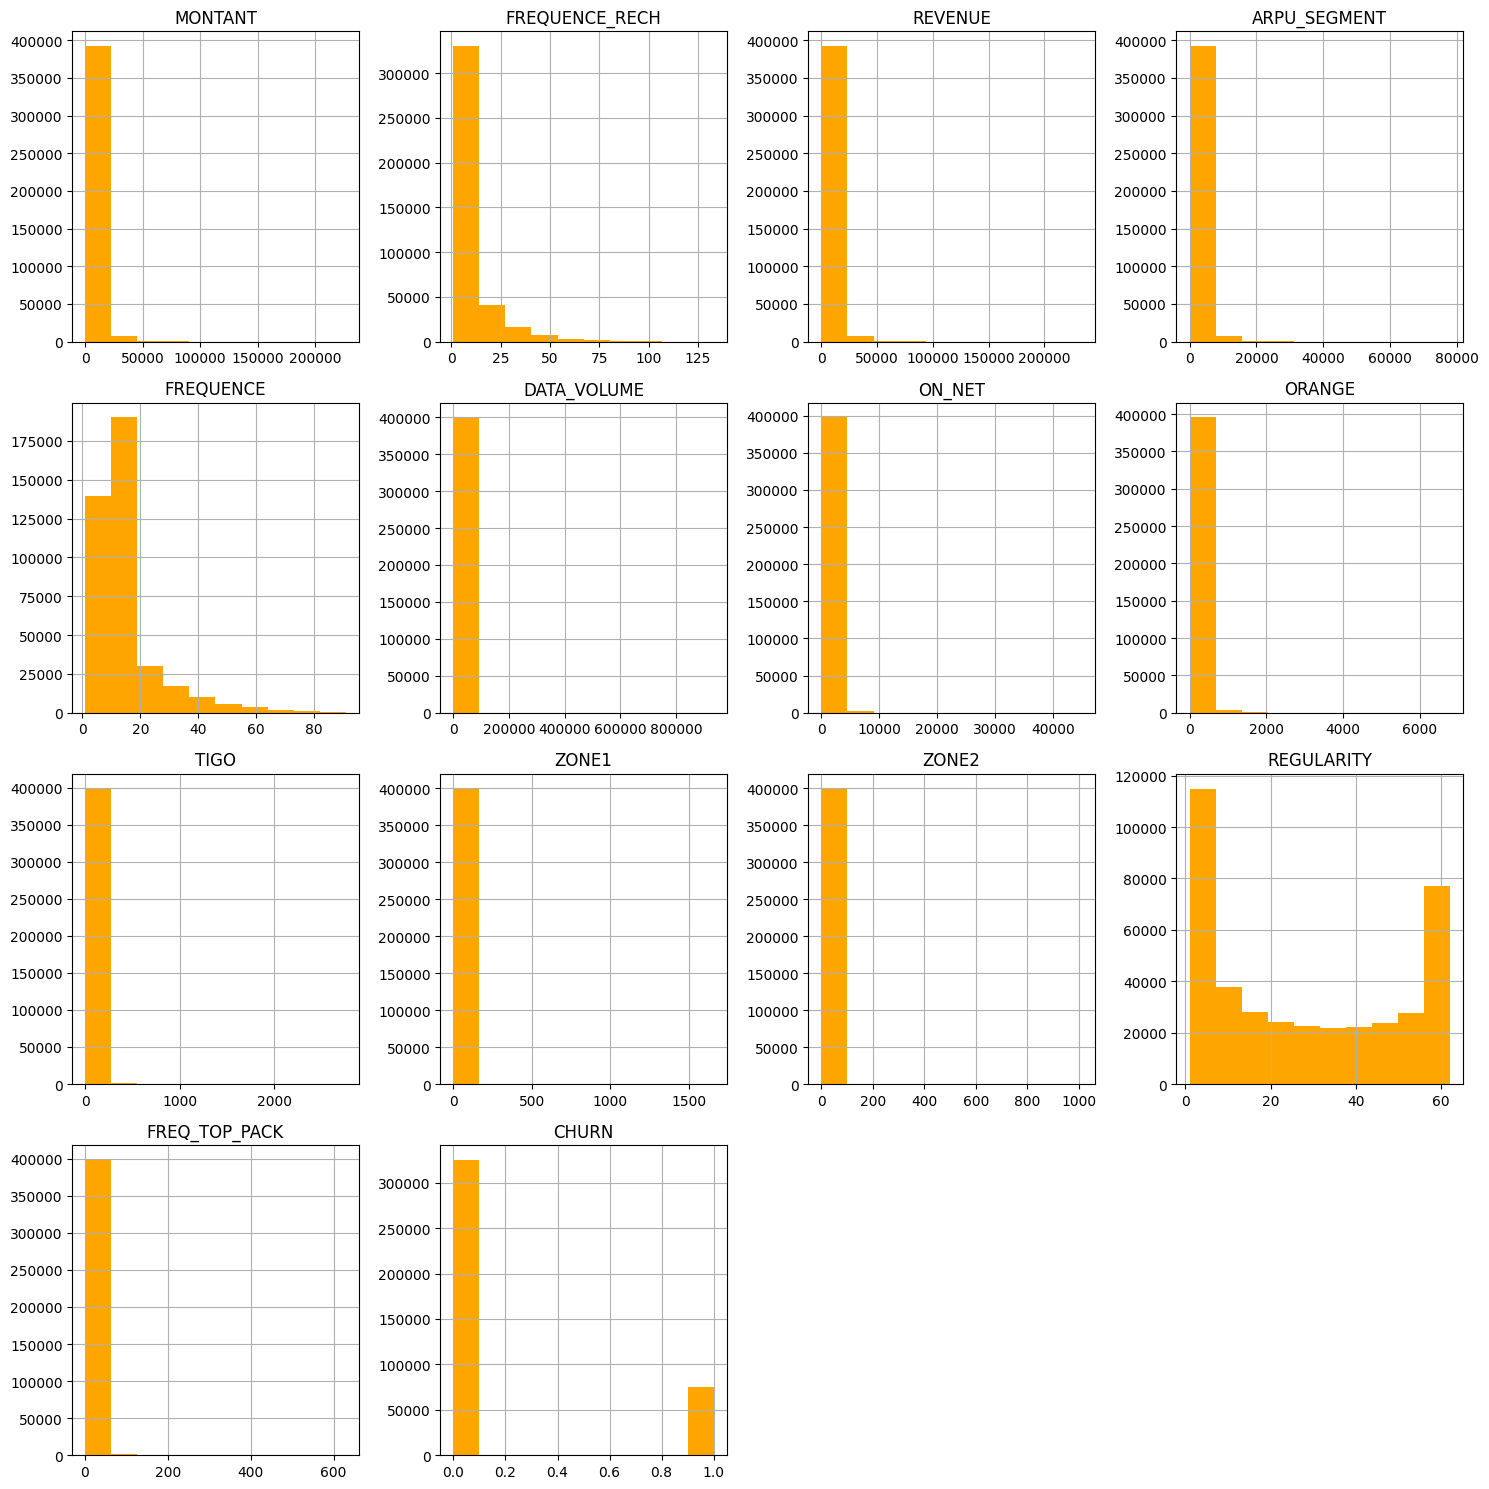

In [ ]:
comm_data.hist(figsize=(15,15), color = 'orange')
plt.tight_layout()
plt.show()

### **3.2 Correlations**

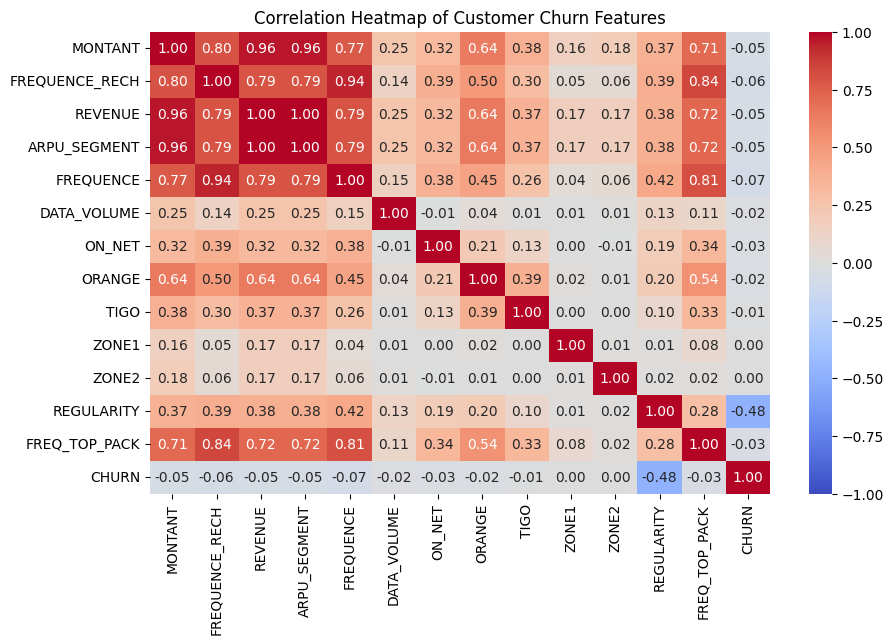

In [ ]:
# correlation heatmap
plt.figure(figsize=(10, 6))

corr_matrix = comm_data[numerical_features].corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f',cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap of Customer Churn Features")
plt.show()

# save the image
plt.savefig('correlation_heatmap.png')

### **3.2 Churn Distribution**

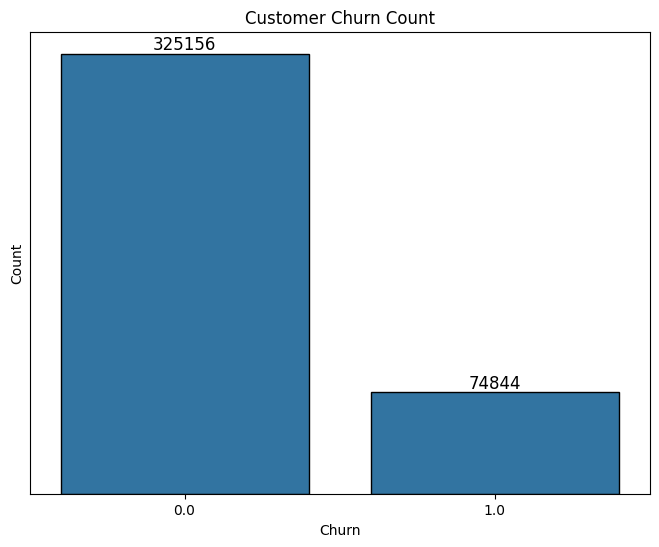

In [ ]:
# countplot of churn
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=comm_data, x='CHURN', edgecolor = 'black')
plt.title('Customer Churn Count')
plt.xlabel('Churn')
plt.yticks([])
plt.ylabel('Count')

# add data labels
ax.bar_label(ax.containers[0], label_type='edge', fontsize = 12)
plt.show()

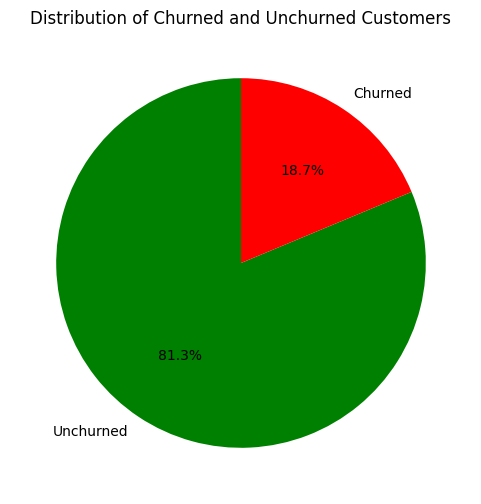

In [ ]:
#Visualizing data using pie chart
churn_counts = comm_data['CHURN'].value_counts()
labels = ['Unchurned', 'Churned']
colors = ['green', 'red']

plt.figure(figsize=(6,6))
plt.pie(churn_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Churned and Unchurned Customers')

#show plot
plt.show()

## **4. Feature Engineering**  
---

### **4.1 Tenure Mapping**

In [7]:
# Mapper for TENURE column
mapper = {
    "K > 24 month": (24 + 27)/2, "I 18-21 month": (18+21)/2, "G 12-15 month": (12+15)/2,
    "H 15-18 month": (15+18)/2, "J 21-24 month": (21+24)/2, "F 9-12 month": (9+12)/2,
    "D 3-6 month": (3+6)/2, "E 6-9 month": (6+9)/2
}

# apply mapper on TENURE column
comm_data['TENURE_LE'] = comm_data['TENURE'].replace(mapper)

In [8]:
# drop tenure column
comm_data = comm_data.drop(columns=['TENURE'], axis=1)

In [ ]:
comm_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   REGION          400000 non-null  object 
 1   MONTANT         400000 non-null  float64
 2   FREQUENCE_RECH  400000 non-null  float64
 3   REVENUE         400000 non-null  float64
 4   ARPU_SEGMENT    400000 non-null  float64
 5   FREQUENCE       400000 non-null  float64
 6   DATA_VOLUME     400000 non-null  float64
 7   ON_NET          400000 non-null  float64
 8   ORANGE          400000 non-null  float64
 9   TIGO            400000 non-null  float64
 10  ZONE1           400000 non-null  float64
 11  ZONE2           400000 non-null  float64
 12  MRG             400000 non-null  object 
 13  REGULARITY      400000 non-null  float64
 14  FREQ_TOP_PACK   400000 non-null  float64
 15  CHURN           400000 non-null  float64
 16  TENURE_LE       400000 non-null  float64
dtypes: float64

## **5. Data Preprocessing**  
---

### **5.1 Label Encoding Categorical Features**

In [9]:
# label encode categorical features
new_categorical_features = comm_data.select_dtypes(exclude=np.number).columns
encoder = LabelEncoder()

# apply the encoder
for feature in new_categorical_features:
    comm_data[feature] = encoder.fit_transform(comm_data[feature])

### **5.2 Balancing Clases**  
The class "1" is the under-represented class hence, the need for us to balance classes.

In [10]:
# Separate the classes
class_0 = comm_data[comm_data['CHURN'] == 0.0]
class_1 = comm_data[comm_data['CHURN'] == 1.0]

# Sample 74,000 from each class
sampled_class_0 = class_0.sample(n=74000, random_state=42)
sampled_class_1 = class_1.sample(n=74000, random_state=42)

# Combine the samples
sampled_df = pd.concat([sampled_class_0, sampled_class_1])

# Shuffle the combined dataset
sampled_df = sampled_df.sample(frac=1, random_state=42).reset_index(drop=True)

# count the number of classes sampled
sampled_df['CHURN'].value_counts()

CHURN
0.0    74000
1.0    74000
Name: count, dtype: int64

### **5.3 Defining Features and Target**

In [11]:
X = sampled_df.drop(columns=['CHURN'])
y = sampled_df['CHURN']

In [12]:
# splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

## **6. Model Training and Evaluation**  
---    
In this section, we explore different classification models and compare the performance to identify the best model

### **6.1 Base Model**  
The base model for this project is the Logistic Regression Model

In [13]:
# LOGISTIC REGRESSION
logreg_model = LogisticRegression(max_iter=1000)

# fit the model
logreg_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

Logistic Regression Model
------------------------------
Accuracy: 0.8299324324324324
------------------------------
Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.77      0.82      7444
         1.0       0.79      0.89      0.84      7356

    accuracy                           0.83     14800
   macro avg       0.83      0.83      0.83     14800
weighted avg       0.84      0.83      0.83     14800

------------------------------
ROC AUC Score: 0.9019661925958522
------------------------------


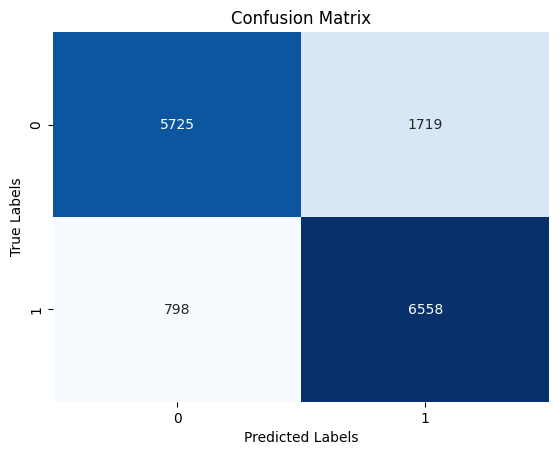

In [19]:
# make predictions
y_pred_logreg = logreg_model.predict(X_test)
y_pred_prob_logreg = logreg_model.predict_proba(X_test)[:, 1]

# evaluate model
logreg_accuracy = accuracy_score(y_test, y_pred_logreg)
logreg_conf_matrix = confusion_matrix(y_test, y_pred_logreg)
logreg_roc_auc = roc_auc_score(y_test, y_pred_prob_logreg)
logreg_report = classification_report(y_test, y_pred_logreg)


# print out results
print(f"Logistic Regression Model\n{'-'*30}")
print(f"Accuracy: {logreg_accuracy}\n{'-'*30}")
# print(f"Confusion Matrix:\n{logreg_conf_matrix}\n{'-'*30}")
print(f"Classification Report:\n{logreg_report}\n{'-'*30}")
print(f"ROC AUC Score: {logreg_roc_auc}\n{'-'*30}")

# heatmap for confusion matrix
sns.heatmap(logreg_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


### **6.2 Additional Models**

#### **6.2.1 Decision Tree**

In [15]:
# initialize the model
dec_tree = DecisionTreeClassifier()

# fit the model
dec_tree.fit(X_train, y_train)

DecisionTreeClassifier()

Decision Tree Model
------------------------------
Accuracy: 0.8093243243243243
------------------------------
Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.75      0.80      7444
         1.0       0.78      0.87      0.82      7356

    accuracy                           0.81     14800
   macro avg       0.81      0.81      0.81     14800
weighted avg       0.81      0.81      0.81     14800

------------------------------
ROC AUC Score: 0.8096574780291721
------------------------------


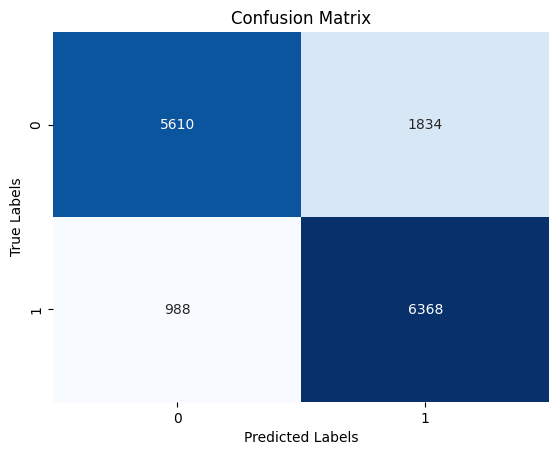

In [18]:
# predictions
y_pred_dec_tree = dec_tree.predict(X_test)

# evaluate model
dec_tree_accuracy = accuracy_score(y_test, y_pred_dec_tree)
dec_tree_conf_matrix = confusion_matrix(y_test, y_pred_dec_tree)
dec_tree_report = classification_report(y_test, y_pred_dec_tree)
dec_tree_roc = roc_auc_score(y_test, y_pred_dec_tree)

# print results
print(f"Decision Tree Model\n{'-'*30}")
print(f"Accuracy: {dec_tree_accuracy}\n{'-'*30}")
# print(f"Confusion Matrix:\n{dec_tree_conf_matrix}\n{'-'*30}")
print(f"Classification Report:\n{dec_tree_report}\n{'-'*30}")
print(f"ROC AUC Score: {dec_tree_roc}\n{'-'*30}")

# heatmap for confusion matrix
sns.heatmap(dec_tree_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

#### **6.2.2 Random Forest Classifier**

In [20]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Random Forest Model
------------------------------
Accuracy: 0.8346621621621622
------------------------------
Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.80      0.83      7444
         1.0       0.81      0.87      0.84      7356

    accuracy                           0.83     14800
   macro avg       0.84      0.83      0.83     14800
weighted avg       0.84      0.83      0.83     14800

------------------------------
ROC AUC Score: 0.8348415312856934
------------------------------


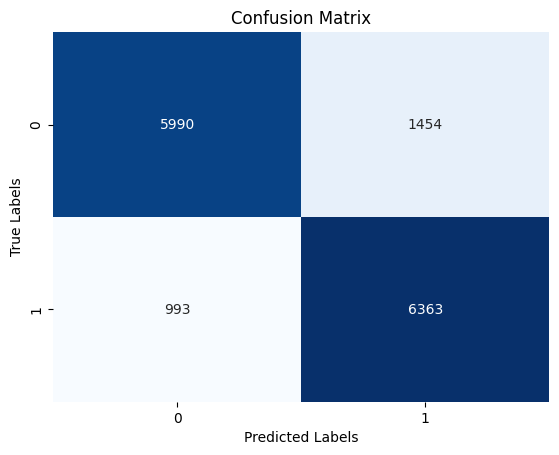

In [21]:
# Predict on the test data
y_pred_rf = rf_model.predict(X_test)


# evaluate model
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_conf_matrix = confusion_matrix(y_test, y_pred_rf)
rf_report = classification_report(y_test, y_pred_rf)
rf_roc = roc_auc_score(y_test, y_pred_rf)


# print out results
print(f"Random Forest Model\n{'-'*30}")
print(f"Accuracy: {rf_accuracy}\n{'-'*30}")
# print(f"Confusion Matrix:\n{rf_conf_matrix}\n{'-'*30}")
print(f"Classification Report:\n{rf_report}\n{'-'*30}")
print(f"ROC AUC Score: {rf_roc}\n{'-'*30}")

# heatmap for confusion matrix
sns.heatmap(rf_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [22]:
# # save the model
# joblib.dump(rf_model, 'rf_model.pkl')

# # load model
# rf_model = joblib.load('rf_model.pkl')

# # predict
# y_pred_ = rf_model.predict_proba(X_test)[:,1]

# print(roc_auc_score(y_test, y_pred_))

#### **6.2.3 XG Boost**

In [23]:
# Initialize the Random Forest model
xgb_model = xgb.XGBClassifier(use_label_encoder = False, eval_metric = 'logloss', n_estimators=215, learning_rate = 0.035, random_state=42)

# Train the model on the training data
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.035, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=215,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

XGBoost Model
------------------------------
Accuracy: 0.8425
------------------------------
Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.80      0.84      7444
         1.0       0.81      0.89      0.85      7356

    accuracy                           0.84     14800
   macro avg       0.85      0.84      0.84     14800
weighted avg       0.85      0.84      0.84     14800

------------------------------
ROC AUC Score: 0.8427591961615005
------------------------------


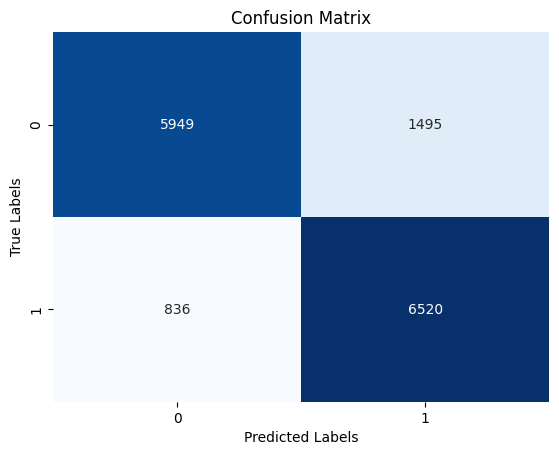

In [24]:
# Predict on the test data
y_pred_xgb = xgb_model.predict(X_test)


# evaluate model
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
xgb_conf_matrix = confusion_matrix(y_test, y_pred_xgb)
xgb_report = classification_report(y_test, y_pred_xgb)
xgb_roc = roc_auc_score(y_test, y_pred_xgb)


# print out results
print(f"XGBoost Model\n{'-'*30}")
print(f"Accuracy: {xgb_accuracy}\n{'-'*30}")
# print(f"Confusion Matrix:\n{xgb_conf_matrix}\n{'-'*30}")
print(f"Classification Report:\n{xgb_report}\n{'-'*30}")
print(f"ROC AUC Score: {xgb_roc}\n{'-'*30}")

# heatmap for confusion matrix
sns.heatmap(xgb_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [26]:
# save model
joblib.dump(xgb_model, 'xgb_model.pkl')

# load model
xgb_model = joblib.load('xgb_model.pkl')

# predict
y_pred_ = xgb_model.predict_proba(X_test)[:,1]

print(roc_auc_score(y_test, y_pred_))

0.9137714949162554


#### **6.2.4 Gradient Boosting Classifier**

In [27]:
# initialize the gradient boost model
grb_model = GradientBoostingClassifier(n_estimators=500, learning_rate=0.5, random_state=42)

# fit the model
grb_model.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.5, n_estimators=500, random_state=42)

XGBoost Model
------------------------------
Accuracy: 0.8391891891891892
------------------------------
Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.79      0.83      7444
         1.0       0.81      0.89      0.85      7356

    accuracy                           0.84     14800
   macro avg       0.84      0.84      0.84     14800
weighted avg       0.84      0.84      0.84     14800

------------------------------
ROC AUC Score: 0.8394655442895133
------------------------------


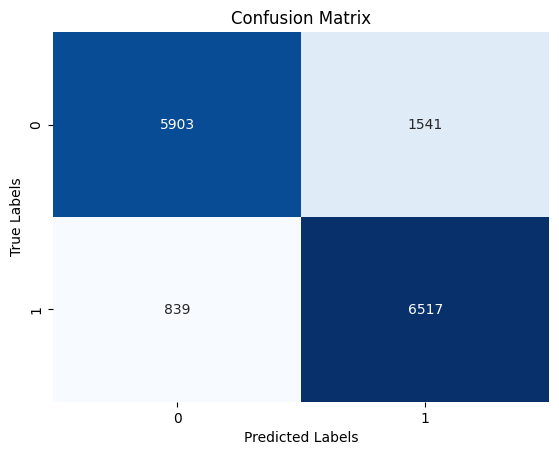

In [28]:
# Predict on the test data
y_pred_grb = grb_model.predict(X_test)


# evaluate model
grb_accuracy = accuracy_score(y_test, y_pred_grb)
grb_conf_matrix = confusion_matrix(y_test, y_pred_grb)
grb_report = classification_report(y_test, y_pred_grb)
grb_roc = roc_auc_score(y_test, y_pred_grb)


# print out results
print(f"XGBoost Model\n{'-'*30}")
print(f"Accuracy: {grb_accuracy}\n{'-'*30}")
# print(f"Confusion Matrix:\n{grb_conf_matrix}\n{'-'*30}")
print(f"Classification Report:\n{grb_report}\n{'-'*30}")
print(f"ROC AUC Score: {grb_roc}\n{'-'*30}")

# heatmap for cnofusion matrix
sns.heatmap(grb_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [29]:
# save the model
joblib.dump(grb_model, 'grb_model.pkl')

# load the model
grb_model = joblib.load('grb_model.pkl')

# make predictions
y_pred_ = grb_model.predict_proba(X_test)[:,1]

print(roc_auc_score(y_test, y_pred_))

0.9096845991487208


### **6.3 Refactoring**
- Apply Kbest for top 8 features  
- Use XGBoost and GradientBoost Classifiers

#### **6.3.1 Selecting top 8 features**

In [30]:
# number of features to select
k = 8

# feature selection
selector = SelectKBest(score_func=f_classif, k=k)
X_new = selector.fit_transform(X, y)

# get boolean mask of selected features
selected_mask = selector.get_support()

# get names of selected features
selected_features = X.columns[selected_mask].tolist()

# print selected features
print(f'Selected Features:\n {selected_features}')

Selected Features:
 ['REGION', 'MONTANT', 'FREQUENCE_RECH', 'REVENUE', 'ARPU_SEGMENT', 'FREQUENCE', 'REGULARITY', 'TENURE_LE']


In [31]:
# splitting data
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.1, random_state=42)

#### **6.3.2 Gradient Boosting Classifier (Refactored)**

In [35]:
# initialize new gradient boost classifier
new_grb_model = GradientBoostingClassifier(n_estimators=500, learning_rate=0.5, random_state=42)

# fit the model
new_grb_model.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.5, n_estimators=500, random_state=42)

Gradient Boost Classifier Model
------------------------------
Accuracy: 0.8385135135135136
------------------------------
Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.79      0.83      7444
         1.0       0.81      0.89      0.84      7356

    accuracy                           0.84     14800
   macro avg       0.84      0.84      0.84     14800
weighted avg       0.84      0.84      0.84     14800

------------------------------
ROC AUC Score: 0.8387890411903531
------------------------------


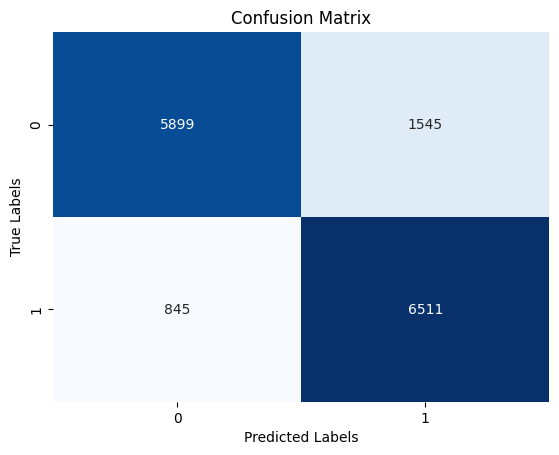

In [38]:
# make predictions
new_pred_grb = new_grb_model.predict(X_test)

# evaluate model
new_grb_accuracy = accuracy_score(y_test, new_pred_grb)
new_grb_conf_matrix = confusion_matrix(y_test, new_pred_grb)
new_grb_report = classification_report(y_test, new_pred_grb)
new_grb_roc = roc_auc_score(y_test, new_pred_grb)


# print out results
print(f"Gradient Boost Classifier Model\n{'-'*30}")
print(f"Accuracy: {new_grb_accuracy}\n{'-'*30}")
# print(f"Confusion Matrix:\n{new_grb_conf_matrix}\n{'-'*30}")
print(f"Classification Report:\n{new_grb_report}\n{'-'*30}")
print(f"ROC AUC Score: {new_grb_roc}\n{'-'*30}")

# heatmap for confusion matrix
sns.heatmap(new_grb_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [37]:
# save the new model
joblib.dump(new_grb_model, 'new_grb_model.pkl')

# load the model
new_grb_model = joblib.load('new_grb_model.pkl')

# make predictions
y_pred_ = new_grb_model.predict_proba(X_test)[:,1]

print(roc_auc_score(y_test, y_pred_))


0.9075170827807207


#### **6.3.3 XGBoost (Refactored)**

In [32]:
# instatiate the model
new_xgb_model = xgb.XGBClassifier(use_label_encoder = False, eval_metric = 'logloss', n_estimators=215, learning_rate = 0.035, random_state=42)

# fit the model
new_xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.035, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=215,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

XGBoost Model
------------------------------
Accuracy: 0.8404054054054054
------------------------------
Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.80      0.83      7444
         1.0       0.81      0.88      0.85      7356

    accuracy                           0.84     14800
   macro avg       0.84      0.84      0.84     14800
weighted avg       0.84      0.84      0.84     14800

------------------------------
ROC AUC Score: 0.8406432338440598
------------------------------


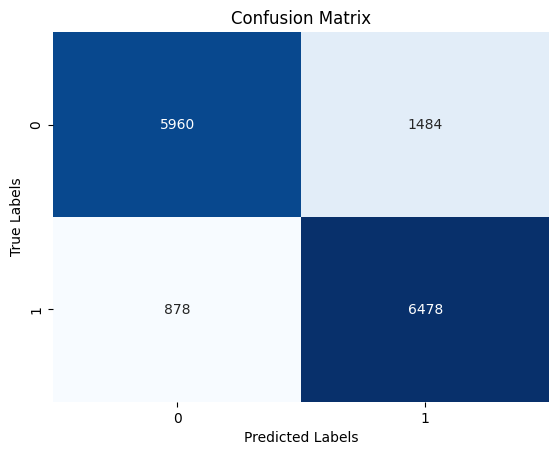

<Figure size 640x480 with 0 Axes>

In [40]:
# make predictions
new_pred_xgb = new_xgb_model.predict(X_test)

# evaluate model
new_xgb_accuracy = accuracy_score(y_test, new_pred_xgb)
new_xgb_conf_matrix = confusion_matrix(y_test, new_pred_xgb)
new_xgb_report = classification_report(y_test, new_pred_xgb)
new_xgb_roc = roc_auc_score(y_test, new_pred_xgb)


# print out results
print(f"XGBoost Model\n{'-'*30}")
print(f"Accuracy: {new_xgb_accuracy}\n{'-'*30}")
# print(f"Confusion Matrix:\n{new_xgb_conf_matrix}\n{'-'*30}")
print(f"Classification Report:\n{new_xgb_report}\n{'-'*30}")
print(f"ROC AUC Score: {new_xgb_roc}\n{'-'*30}")

# heatmap for confusion matrix
sns.heatmap(new_xgb_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# save the confusion matrix to png
plt.savefig('new_xgb_conf_matrix.png')

In [34]:
# save the new model
joblib.dump(new_xgb_model, 'new_xgb_model.pkl')

# load the model
new_xgb_model = joblib.load('new_xgb_model.pkl')

# make predictions
y_pred_ = new_xgb_model.predict_proba(X_test)[:,1]

print(roc_auc_score(y_test, y_pred_))

0.9107351476122312


## **7. Conclusion**
---

### **Best Model**
After training mulitple models, the ***XGBoost Classifier*** - (new_xgb_model.pkl) turned out to be the best performing model with an overall accuracy of  $84\%$, trained on 8 top features from the dataset and has about the same predictive power for the two classes.  

We are able to predict with $84\%$ accuracy as to whether a client churns or not.